In [1]:
import pandas as pd
# Data Collection

# Load the data
df = pd.read_csv('data.csv')

In [14]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [3]:
df.shape

(6362620, 11)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


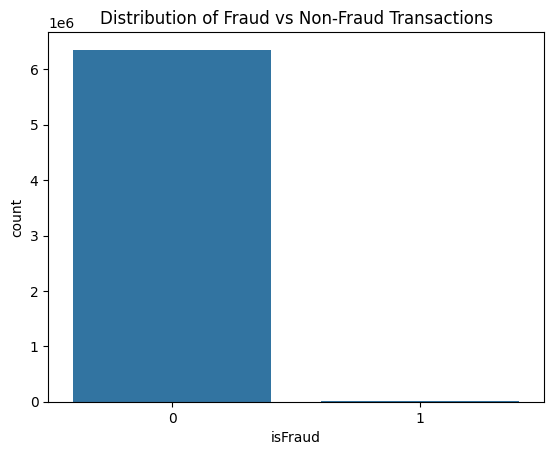

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable (isFraud)
print(df['isFraud'].value_counts(normalize=True) * 100)

# Visualize the target variable
sns.countplot(data=df, x='isFraud')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

## Feature Engineering 
 - Dropping unnecesary columns
 - Label Encoding --> Nominal Columns --> Converts categorical to numerical
 - Create a new feature

In [3]:
# Drop unnecessary columns - also like most unique values
df.drop(['nameOrig', 'nameDest', 'step'], axis=1, inplace=True)  # These columns are not useful for modeling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [13]:
# Create separate dataframes for fraud and non-fraud cases
fraud = df[df['isFraud']==1]
non_fraud = df[df['isFraud']==0]

fraud.shape, non_fraud.shape

((8213, 9), (6354407, 9))

In [14]:
#Analyzing the fraud dataset

fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
step,8213.0,3.684139e+02,2.163887e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8213.0,1.467967e+06,2.404253e+06,0.0,127091.33,441423.44,1517771.48,1.000000e+07
oldbalanceOrg,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,5.958504e+07
newbalanceOrig,8213.0,1.923926e+05,1.965666e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8213.0,5.442496e+05,3.336421e+06,0.0,0.00,0.00,147828.66,2.362305e+08
newbalanceDest,8213.0,1.279708e+06,3.908817e+06,0.0,0.00,4676.42,1058725.22,2.367265e+08
isFraud,8213.0,1.000000e+00,0.000000e+00,1.0,1.00,1.00,1.00,1.000000e+00
isFlaggedFraud,8213.0,1.948131e-03,4.409731e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [15]:
fraud.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [16]:
import numpy as np

# Find the correlation between the variables
numeric_data = fraud.select_dtypes(include=[np.number])
print(numeric_data.dtypes)

category_data = fraud.select_dtypes(exclude=[np.number])
print()
print(category_data.dtypes)

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

type    object
dtype: object


In [17]:
numeric_data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.048320,0.063305,0.058487,0.018706,0.027891,NaN,0.034538
amount,0.048320,1.000000,0.858859,0.338561,-0.007037,0.299403,NaN,0.062365
oldbalanceOrg,0.063305,0.858859,1.000000,0.767811,-0.013187,0.185974,NaN,0.076819
newbalanceOrig,0.058487,0.338561,0.767811,1.000000,-0.015964,-0.032040,NaN,0.171402
oldbalanceDest,0.018706,-0.007037,-0.013187,-0.015964,1.000000,0.880353,NaN,-0.007207
newbalanceDest,0.027891,0.299403,0.185974,-0.032040,0.880353,1.000000,NaN,-0.014465
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlaggedFraud,0.034538,0.062365,0.076819,0.171402,-0.007207,-0.014465,NaN,1.000000


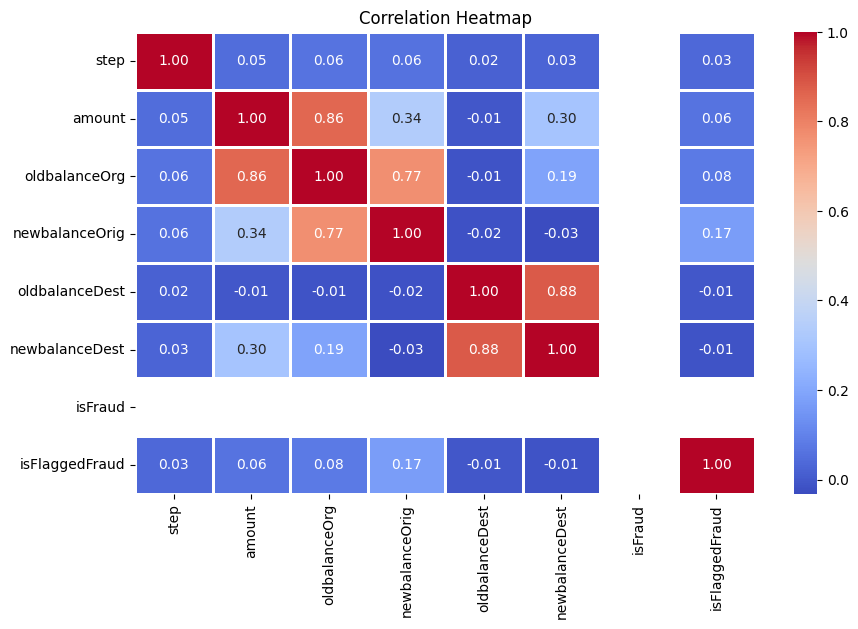

In [18]:
# Visualizing the correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show() 

Almost red colour means, we can remove any of the column as both possess same contribution in model training, but as of now we are not dropping any columns

In [5]:
from sklearn.preprocessing import LabelEncoder

# 2. Convert 'type' column into numerical values using Label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
df['type'].unique() 

array([3, 4, 1, 2, 0])

In [7]:
df.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,4,181.00,181.00,0.00,0.0,0.00,1,0
3,1,181.00,181.00,0.00,21182.0,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,3,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,3,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,3,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,3,4024.36,2671.00,0.00,0.0,0.00,0,0
9,2,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [ ]:
# 3. Create a new feature: Balance difference for origin and destination accounts
df['balanceDiffOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [22]:
# Display the updated dataframe
print(df.head())

   step  type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     3   9839.64       170136.0       160296.36             0.0   
1     1     3   1864.28        21249.0        19384.72             0.0   
2     1     4    181.00          181.0            0.00             0.0   
3     1     1    181.00          181.0            0.00         21182.0   
4     1     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  balanceDiffOrig  balanceDiffDest  
0             0.0        0               0         -9839.64              0.0  
1             0.0        0               0         -1864.28              0.0  
2             0.0        1               0          -181.00              0.0  
3             0.0        1               0          -181.00         -21182.0  
4             0.0        0               0        -11668.14              0.0  


In [8]:
# Split the data into features (X) and target (y)
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled) # Stratify maintains the same class distribution(class refers to fraud and non-fraud) in the training and testing sets

In [9]:
# Handle Class Imbalance RandomUnderSampler
# Apply Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [10]:
# Check the new distribution of the target variable
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

isFraud
0    50.0
1    50.0
Name: proportion, dtype: float64


In [12]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler

# Example: Fit the scaler on your training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data

StandardScaler()

In [17]:
X_train.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
6859230,161,4,5.666617e+05,5.666617e+05,0.00,0.00,0.00,0,-5.666617e+05,0.00
799846,40,0,1.261698e+05,7.829261e+06,7955430.49,370910.14,244740.36,0,1.261698e+05,-126169.78
2433094,203,3,1.364990e+03,0.000000e+00,0.00,0.00,0.00,0,0.000000e+00,0.00
10359694,485,4,1.165666e+05,1.165666e+05,0.00,0.00,0.00,0,-1.165666e+05,0.00
10111081,330,4,3.486701e+06,3.486701e+06,0.00,0.00,0.00,0,-3.486701e+06,0.00


In [14]:
import pickle

# Save the scaler to a file
with open('scalerUnd.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [15]:
# Calculating the shape of the training and testing sets
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train_scaled shape: (13140, 7)
X_test_scaled shape: (3286, 7)
y_train shape: (13140,)
y_test shape: (3286,)


In [16]:
# Model Training and Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

def evaluate_model(model, X_test, y_test):

    # Calculate the predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred) # y_test is actual value and y_pred is predicted value
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Return the metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# List to store the results
results = []

# Train and evaluate the models
for model_name, model in models.items():
    print(f'Training {model_name}...')

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate the model
    metrics = evaluate_model(model, X_test_scaled, y_test)
    results.append(metrics)

# Display the results
results_df = pd.DataFrame(results)

Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


In [17]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,DecisionTreeClassifier,0.993609,0.992112,0.995131,0.993619,0.993609
1,RandomForestClassifier,0.993609,0.988554,0.998783,0.993642,0.999330
2,GradientBoostingClassifier,0.989044,0.980850,0.997565,0.989137,0.998295
3,XGBClassifier,0.994827,0.990942,0.998783,0.994847,0.999044


In [ ]:
results_df                                                                                                                                  



,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,DecisionTreeClassifier,0.999634,0.999487,0.999780,0.999634,0.999634
1,RandomForestClassifier,0.999757,0.999563,0.999952,0.999757,0.999993
2,GradientBoostingClassifier,0.989664,0.984297,0.995206,0.989721,0.998688
3,XGBClassifier,0.998590,0.997842,0.999341,0.998591,0.999970


To improve the computational effeciency, taking 50% of the entire data for model building and testing keeping the ratio intact

In [ ]:
# To improve the computational effeciency, taking 50% of the entire data for model building and testing keeping the ratio intact

import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into fraud and non-fraud cases
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

# Sample each class separately while maintaining proportions
fraud_sample = fraud_data.sample(frac=0.5, random_state=42)
non_fraud_sample = non_fraud_data.sample(frac=0.5, random_state=42)

# Combine the sampled data back together
sampled_data = pd.concat([fraud_sample, non_fraud_sample], axis=0)

Model Optimization - Hyper Parameter Tunning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for each model
params = {
    'Decision Tree' : {
        'max_depth' : [10, 20, 50],
        'min_samples_split' : [2, 5, 10]
    },
    'Random Forest' : {
        'n_estimators' : [50, 100, 200],
        'max_depth' : [10, 20],
        'min_samples_split' : [2, 5]
    },
    'Gradient Boosting' : {
        'n_estimators' : [50, 100],
        'learning_rate' : [0.05, 0.1],
        'max_depth' : [3, 5]
    },
    'XGBoost' : {
        'n_estimators' : [50, 100],
        'learning_rate' : [0.05, 0.1],
        'max_depth' : [3, 5]
    }
}

# Perform GridSearchCV(Hyper parameter tuning) for each model 
best_params = {}
for model_name, model in models.items():
    print(f'Tuning hyperparameters for {model_name}...')
    grid_search = GridSearchCV(estimator=model,
                               param_grid=params[model_name],
                               scoring='f1',
                               cv=5, #cross validation
                               verbose=2)
    grid_search.fit(X_train_scaled, y_train)  # Fit the model to the training data
    best_params[model_name] = grid_search.best_params_

# Display the best hyperparameters for each model
for model_name, params in best_params.items():
    print(f'Best hyperparameters for {model_name}: {params}')

Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] 

In [20]:
# Model Training and Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Calculate the predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Return the metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Define the models with best hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=50, min_samples_split=10),
    'Random Forest': RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100),
    'XGBoost': XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
}

# List to store the results
results = []

# Train and evaluate the models
for model_name, model in models.items():
    print(f'Training {model_name} with best hyperparameters...')

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Evaluate the model
    metrics = evaluate_model(model, X_test_scaled, y_test)
    results.append(metrics)

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

Training Decision Tree with best hyperparameters...
Training Random Forest with best hyperparameters...
Training Gradient Boosting with best hyperparameters...
Training XGBoost with best hyperparameters...
                        Model  Accuracy  Precision    Recall  F1 Score  \
0      DecisionTreeClassifier  0.993001   0.991505  0.994522  0.993011   
1      RandomForestClassifier  0.993609   0.988554  0.998783  0.993642   
2  GradientBoostingClassifier  0.994218   0.990338  0.998174  0.994241   
3               XGBClassifier  0.994218   0.989157  0.999391  0.994248   

    ROC AUC  
0  0.994790  
1  0.999301  
2  0.998768  
3  0.999096  


In [25]:
# Save the XGBOOST model

import pickle

# Save the model as a pickle file
pickle_file_path = '2xgboost.pkl'

# Save the model to the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(models['XGBoost'], file)

In [26]:
# Save the Decision Tree model

import pickle

# Save the model as a pickle file
pickle_file_path = '2decisionTree.pkl'

# Save the model to the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(models['Decision Tree'], file)

In [27]:
# Save the Random Forest model

import pickle

# Save the model as a pickle file
pickle_file_path = '2RandForest.pkl'

# Save the model to the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(models['Random Forest'], file)

In [28]:
# Save the Gradient Boosting model

import pickle

# Save the model as a pickle file
pickle_file_path = '2GradientBoosting.pkl'

# Save the model to the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(models['Gradient Boosting'], file)

In [30]:
import os  # Import the os module
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the scaler is already defined and fitted
scaler = StandardScaler()

# Load the model from the pickle file
file_path = r'C:\Users\91996\Desktop\SEM 8\MAIN PROJECT\Code Work\xgboost_model_dataset2.pkl'
if os.path.exists(file_path):
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
else:
    print(f"File not found: {file_path}")

# Take input from the user
data = {
    'step': 1,
    'type': 3,
    'amount': 1000000000.0,
    'oldbalanceOrg': 181.0,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 0.0,
    'newbalanceDest': 0.0,
    'isFlaggedFraud': 1,
    'balanceDiffOrig': -181.0,
    'balanceDiffDest': 0.0
}

# Convert the input data into a dataframe
input_data = pd.DataFrame([data])

# Load the scaler from the saved file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make a prediction
prediction = model.predict(input_data)[0]
prediction_prob = model.predict_proba(input_data)[0][1]

# Display the prediction
if prediction == 1:
    print(f'The transaction is fraudulent with a probability of {prediction_prob}.')
else:
    print(f'The transaction is not fraudulent with a probability of {1 - prediction_prob}.')

The transaction is not fraudulent with a probability of 0.8960862681269646.


In [29]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('data.csv')

# Create a subset of the first 10 rows
subset_df = df.head(10)

# Save the subset to a CSV file
subset_df.to_csv('subset_10_rows.csv', index=False)

print("Subset saved to 'subset_10_rows.csv'")

Subset saved to 'subset_10_rows.csv'
